In [344]:
import pandas as pd
import matplotlib.pyplot as plt 
import string
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import plotly.express as exp
from sklearn import preprocessing


In [345]:
user_csv = pd.read_csv("BX-Users.csv")
user_rating = pd.read_csv("BX-Book-Ratings.csv")
book = pd.read_csv("BX-Books.csv")
len(user_csv)
user_csv
user_csv['location']=user_csv['location'].str.replace(" " , "")
user_csv['location']=user_csv['location'].str.replace("," , "")

le = preprocessing.LabelEncoder()
for column_name in user_csv.columns:
    if user_csv['location'].dtype == object:
        user_csv['location'] = le.fit_transform(user_csv['location'])
    else:
        pass


In [346]:
user_csv_final = pd.read_csv("BX-Users.csv")
user_csv_final

uid                            location   age
0            1                  nyc, new york, usa   NaN
1            2           stockton, california, usa  18.0
2            3     moscow, yukon territory, russia   NaN
3            4           porto, v.n.gaia, portugal  17.0
4            5  farnborough, hants, united kingdom   NaN
...        ...                                 ...   ...
206442  278853      stranraer, n/a, united kingdom  17.0
206443  278855  tacoma, washington, united kingdom  50.0
206444  278856           brampton, ontario, canada   NaN
206445  278857           knoxville, tennessee, usa   NaN
206446  278858                dublin, n/a, ireland   NaN

[206447 rows x 3 columns]

In [347]:
res=book.merge(user_rating , on='isbn' ,how="inner")
res

isbn                                         book_title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0002005018                                       Clara Callan   
3       0002005018                                       Clara Callan   
4       0002005018                                       Clara Callan   
...            ...                                                ...   
614076  0312266448  The Military Quotation Book : Revised and Expa...   
614077  067161746X  The Bachelor Home Companion: A Practical Guide...   
614078  0743203763  As Hogan Said . . . : The 389 Best Things Anyo...   
614079  0767907566  All Elevations Unknown: An Adventure in the He...   
614080  0912333022  The Are You Being Served? Stories: 'Camping In...   

                 book_author  year_of_publication                publisher  \
0         Mark P. O. Morford                 2002  Oxford University Press   
1       Richard Bruce Wright                 2001    HarperFlamingo Canada   
2       Richard Bruce Wright                 2001    HarperFlamingo Canada   
3       Richard Bruce Wright                 2001    HarperFlamingo Canada   
4       Richard Bruce Wright                 2001    HarperFlamingo Canada   
...                      ...                  ...                      ...   
614076        James Charlton                 2002       Thomas Dunne Books   
614077         P.J. O'Rourke                 1987             Pocket Books   
614078        Randy Voorhees                 2000         Simon & Schuster   
614079          Sam Lightner                 2001           Broadway Books   
614080          Jeremy Lloyd                 1997               Kqed Books   

                                                  summary            category  \
0       Provides an introduction to classical myths pl...  ['social science']   
1       In a small town in Canada, Clara Callan reluct...       ['actresses']   
2       In a small town in Canada, Clara Callan reluct...       ['actresses']   
3       In a small town in Canada, Clara Callan reluct...       ['actresses']   
4       In a small town in Canada, Clara Callan reluct...       ['actresses']   
...                                                   ...                 ...   
614076  Contains more than 1,200 quotations about war,...       ['reference']   
614077  A tongue-in-cheek survival guide for single pe...           ['humor']   
614078  Golf lovers will revel in this collection of t...           ['humor']   
614079  A daring twist on the travel-adventure genre t...          ['nature']   
614080  These hilarious stories by the creator of publ...         ['fiction']   

           uid  rating  
0            2       0  
1            8       5  
2        11400       0  
3        11676       8  
4        41385       0  
...        ...     ...  
614076  278851       0  
614077  278851       7  
614078  278851       0  
614079  278851       5  
614080  278851       7  

[614081 rows x 9 columns]

In [348]:
user_csv.info()
user_csv.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206447 entries, 0 to 206446
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   uid       206447 non-null  int64  
 1   location  206447 non-null  int64  
 2   age       122881 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 4.7 MB


uid             0
location        0
age         83566
dtype: int64

In [349]:
user_csv['age'] = user_csv['age'].fillna(int(user_csv['age'].mean()))
user_csv_final['age'] = user_csv_final['age'].fillna(int(user_csv_final['age'].mean()))
user_csv_final

uid                            location   age
0            1                  nyc, new york, usa  34.0
1            2           stockton, california, usa  18.0
2            3     moscow, yukon territory, russia  34.0
3            4           porto, v.n.gaia, portugal  17.0
4            5  farnborough, hants, united kingdom  34.0
...        ...                                 ...   ...
206442  278853      stranraer, n/a, united kingdom  17.0
206443  278855  tacoma, washington, united kingdom  50.0
206444  278856           brampton, ontario, canada  34.0
206445  278857           knoxville, tennessee, usa  34.0
206446  278858                dublin, n/a, ireland  34.0

[206447 rows x 3 columns]

In [350]:
#user_csv['location'] = user_csv['location'].str.replace(" " , "")
user_csv

uid  location   age
0            1     30409  34.0
1            2     40287  18.0
2            3     27712  34.0
3            4     33532  17.0
4            5     13945  34.0
...        ...       ...   ...
206442  278853     40395  17.0
206443  278855     41095  50.0
206444  278856      5745  34.0
206445  278857     21317  34.0
206446  278858     12142  34.0

[206447 rows x 3 columns]

In [351]:
scalar=MinMaxScaler()
scaled_data = scalar.fit_transform(user_csv)
scaled_data

array([[0.00000000e+00, 6.42176842e-01, 1.47186147e-01],
       [3.58606741e-06, 8.50780310e-01, 7.79220779e-02],
       [7.17213482e-06, 5.85221633e-01, 1.47186147e-01],
       ...,
       [9.99992828e-01, 1.21322831e-01, 1.47186147e-01],
       [9.99996414e-01, 4.50172112e-01, 1.47186147e-01],
       [1.00000000e+00, 2.56414588e-01, 1.47186147e-01]])

In [352]:
scaled_df = pd.DataFrame(data = scaled_data,columns=user_csv.columns[0:])

scaled_df=scaled_df.drop(columns=['uid'])
scaled_df

location       age
0       0.642177  0.147186
1       0.850780  0.077922
2       0.585222  0.147186
3       0.708128  0.073593
4       0.294490  0.147186
...          ...       ...
206442  0.853061  0.073593
206443  0.867844  0.216450
206444  0.121323  0.147186
206445  0.450172  0.147186
206446  0.256415  0.147186

[206447 rows x 2 columns]

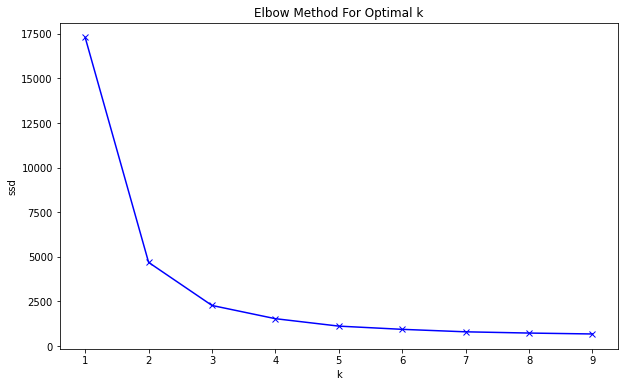

In [353]:
data = scaled_df
# Calculate sum of squared distances
ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    ssd.append(km.inertia_) 
plt.figure(figsize=(10,6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title('Elbow Method For Optimal k')
plt.show()

In [354]:
kmean = KMeans(n_clusters=2)
kmean.fit(data)
pred = kmean.labels_

In [355]:
pred
exp.scatter(data_frame= user_csv,x = 'location',y = 'age',color=kmean.labels_)

In [356]:
user_csv_final
kmeans_csv = user_csv.merge(user_csv_final, how ='inner' , on ='uid')
kmeans_csv = kmeans_csv.drop(columns=['location_x','age_x'])
kmeans_csv = kmeans_csv.rename(columns={"location_y":'location' , 'age_y':"age"})
kmeans_csv

uid                            location   age
0            1                  nyc, new york, usa  34.0
1            2           stockton, california, usa  18.0
2            3     moscow, yukon territory, russia  34.0
3            4           porto, v.n.gaia, portugal  17.0
4            5  farnborough, hants, united kingdom  34.0
...        ...                                 ...   ...
206442  278853      stranraer, n/a, united kingdom  17.0
206443  278855  tacoma, washington, united kingdom  50.0
206444  278856           brampton, ontario, canada  34.0
206445  278857           knoxville, tennessee, usa  34.0
206446  278858                dublin, n/a, ireland  34.0

[206447 rows x 3 columns]

In [357]:
cluster_list = pd.DataFrame()
cluster_list['cluster'] = kmean.labels_

In [358]:
cluster_list
con = pd.concat([cluster_list,kmeans_csv],axis=1, ignore_index=False)
con

cluster     uid                            location   age
0             1       1                  nyc, new york, usa  34.0
1             1       2           stockton, california, usa  18.0
2             1       3     moscow, yukon territory, russia  34.0
3             1       4           porto, v.n.gaia, portugal  17.0
4             0       5  farnborough, hants, united kingdom  34.0
...         ...     ...                                 ...   ...
206442        1  278853      stranraer, n/a, united kingdom  17.0
206443        1  278855  tacoma, washington, united kingdom  50.0
206444        0  278856           brampton, ontario, canada  34.0
206445        0  278857           knoxville, tennessee, usa  34.0
206446        0  278858                dublin, n/a, ireland  34.0

[206447 rows x 4 columns]

In [359]:
merged_data = con.merge(res,how="inner" , on='uid')

In [360]:
merged_data=merged_data.drop(columns=['publisher','category','year_of_publication'])
merged_data

cluster     uid                         location   age        isbn  \
0            1       2        stockton, california, usa  18.0  0195153448   
1            0       9       germantown, tennessee, usa  34.0  0440234743   
2            0       9       germantown, tennessee, usa  34.0  0452264464   
3            0       9       germantown, tennessee, usa  34.0  0609804618   
4            0      12      fort bragg, california, usa  34.0  1879384493   
...        ...     ...                              ...   ...         ...   
42703        0  278849      georgetown, ontario, canada  23.0  0445210214   
42704        0  278849      georgetown, ontario, canada  23.0  0771012837   
42705        0  278849      georgetown, ontario, canada  23.0  0380698439   
42706        0  278849      georgetown, ontario, canada  23.0  0920656307   
42707        0  278852  brisbane, queensland, australia  32.0  0449907597   

                                              book_title         book_author  \
0                                    Classical Mythology  Mark P. O. Morford   
1                                          The Testament        John Grisham   
2                   Beloved (Plume Contemporary Fiction)       Toni Morrison   
3      Our Dumb Century: The Onion Presents 100 Years...           The Onion   
4      If I'd Known Then What I Know Now: Why Not Lea...       J. R. Parrish   
...                                                  ...                 ...   
42703                    Mythology 101 (Questar Fantasy)       Jody Lynn Nye   
42704      Klondike: The Last Great Gold Rush, 1896-1899       Pierre Berton   
42705  Behind the Attic Wall (Avon Camelot Books (Pap...      Sylvia Cassedy   
42706                            Secret of Willow Castle             Ly Cook   
42707    Dave Barry's Only Travel Guide You'll Ever Need          Dave Barry   

                                                 summary  rating  
0      Provides an introduction to classical myths pl...       0  
1      A suicidal billionaire, a burnt-out Washington...       0  
2      Staring unflinchingly into the abyss of slaver...       6  
3      The staff of The Onion presents a satirical co...       0  
4      Provides advice on ways to succeed in business...      10  
...                                                  ...     ...  
42703  Keith Doyle is determined in his campaign to t...       0  
42704  The Klondike stampede was a wild interlude in ...       0  
42705  In the bleak, forbidding house of her great-au...       9  
42706  Canadian story early 19th century Orphaned ser...       0  
42707  One of America&#39;s favorite humorists takes ...       8  

[42708 rows x 9 columns]

In [361]:
#cluster_map = merged_data.groupby(['cluster', 'location'])['rating'].mean().reset_index().sort_values(['cluster','rating'],ascending=False)


In [362]:
cluster0 = merged_data[(merged_data["cluster"]==0)]
cluster1 = merged_data[(merged_data['cluster']==1)]
cluster0

cluster     uid                         location   age        isbn  \
1            0       9       germantown, tennessee, usa  34.0  0440234743   
2            0       9       germantown, tennessee, usa  34.0  0452264464   
3            0       9       germantown, tennessee, usa  34.0  0609804618   
4            0      12      fort bragg, california, usa  34.0  1879384493   
9            0      16     albuquerque, new mexico, usa  34.0  0345402871   
...        ...     ...                              ...   ...         ...   
42703        0  278849      georgetown, ontario, canada  23.0  0445210214   
42704        0  278849      georgetown, ontario, canada  23.0  0771012837   
42705        0  278849      georgetown, ontario, canada  23.0  0380698439   
42706        0  278849      georgetown, ontario, canada  23.0  0920656307   
42707        0  278852  brisbane, queensland, australia  32.0  0449907597   

                                              book_title       book_author  \
1                                          The Testament      John Grisham   
2                   Beloved (Plume Contemporary Fiction)     Toni Morrison   
3      Our Dumb Century: The Onion Presents 100 Years...         The Onion   
4      If I'd Known Then What I Know Now: Why Not Lea...     J. R. Parrish   
9                                               Airframe  Michael Crichton   
...                                                  ...               ...   
42703                    Mythology 101 (Questar Fantasy)     Jody Lynn Nye   
42704      Klondike: The Last Great Gold Rush, 1896-1899     Pierre Berton   
42705  Behind the Attic Wall (Avon Camelot Books (Pap...    Sylvia Cassedy   
42706                            Secret of Willow Castle           Ly Cook   
42707    Dave Barry's Only Travel Guide You'll Ever Need        Dave Barry   

                                                 summary  rating  
1      A suicidal billionaire, a burnt-out Washington...       0  
2      Staring unflinchingly into the abyss of slaver...       6  
3      The staff of The Onion presents a satirical co...       0  
4      Provides advice on ways to succeed in business...      10  
9      A fatal mid-air collision involving a commerci...       9  
...                                                  ...     ...  
42703  Keith Doyle is determined in his campaign to t...       0  
42704  The Klondike stampede was a wild interlude in ...       0  
42705  In the bleak, forbidding house of her great-au...       9  
42706  Canadian story early 19th century Orphaned ser...       0  
42707  One of America&#39;s favorite humorists takes ...       8  

[18917 rows x 9 columns]

In [363]:
#NOW WE WANT TO PREDICT RATING WITH SAME CLUSTER USERS 
#cluster0
#avg_book_rating = cluster0.groupby('rating')['book_title'].mean()


##cluster0

In [364]:
cluster_map = cluster0.groupby(['book_title'])['rating'].mean().reset_index().sort_values(['rating'],ascending=False)


In [365]:
cluster_map

book_title  rating
6176                                     Riddley Walker    10.0
7117                                   Tales of the Sea    10.0
9347        The Unprotected Witness (Laurel-Leaf Books)    10.0
1702                              Clifford, We Love You    10.0
9350                                 The Valentine Rose    10.0
...                                                 ...     ...
7819  The Ecstatic Journey: The Transforming Power o...     0.0
3920                                 Instrument of Fate     0.0
7821                                   The Edge of Town     0.0
3918                                       Instant Calm     0.0
5249  News from the Republic of Letters: No. 12, Fal...     0.0

[10499 rows x 2 columns]

In [366]:
cluster0['rating'].replace(to_replace = 0, value = cluster_map['rating'].mean(), inplace=True)


/tmp/ipykernel_5427/1977187703.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [367]:
cluster0

cluster     uid                         location   age        isbn  \
1            0       9       germantown, tennessee, usa  34.0  0440234743   
2            0       9       germantown, tennessee, usa  34.0  0452264464   
3            0       9       germantown, tennessee, usa  34.0  0609804618   
4            0      12      fort bragg, california, usa  34.0  1879384493   
9            0      16     albuquerque, new mexico, usa  34.0  0345402871   
...        ...     ...                              ...   ...         ...   
42703        0  278849      georgetown, ontario, canada  23.0  0445210214   
42704        0  278849      georgetown, ontario, canada  23.0  0771012837   
42705        0  278849      georgetown, ontario, canada  23.0  0380698439   
42706        0  278849      georgetown, ontario, canada  23.0  0920656307   
42707        0  278852  brisbane, queensland, australia  32.0  0449907597   

                                              book_title       book_author  \
1                                          The Testament      John Grisham   
2                   Beloved (Plume Contemporary Fiction)     Toni Morrison   
3      Our Dumb Century: The Onion Presents 100 Years...         The Onion   
4      If I'd Known Then What I Know Now: Why Not Lea...     J. R. Parrish   
9                                               Airframe  Michael Crichton   
...                                                  ...               ...   
42703                    Mythology 101 (Questar Fantasy)     Jody Lynn Nye   
42704      Klondike: The Last Great Gold Rush, 1896-1899     Pierre Berton   
42705  Behind the Attic Wall (Avon Camelot Books (Pap...    Sylvia Cassedy   
42706                            Secret of Willow Castle           Ly Cook   
42707    Dave Barry's Only Travel Guide You'll Ever Need        Dave Barry   

                                                 summary     rating  
1      A suicidal billionaire, a burnt-out Washington...   4.611188  
2      Staring unflinchingly into the abyss of slaver...   6.000000  
3      The staff of The Onion presents a satirical co...   4.611188  
4      Provides advice on ways to succeed in business...  10.000000  
9      A fatal mid-air collision involving a commerci...   9.000000  
...                                                  ...        ...  
42703  Keith Doyle is determined in his campaign to t...   4.611188  
42704  The Klondike stampede was a wild interlude in ...   4.611188  
42705  In the bleak, forbidding house of her great-au...   9.000000  
42706  Canadian story early 19th century Orphaned ser...   4.611188  
42707  One of America&#39;s favorite humorists takes ...   8.000000  

[18917 rows x 9 columns]